# Topic modeling with (CorEx)

## Data handling

### Load and clean subtitles text

In [17]:
import glob
import json
import text

data_path = "../data/tratamento-precoce-top-200/"

data = [file.split("/")[-1] for file in glob.glob("../data/tratamento-precoce-top-200/subtitles-new/*") ]

subtitles = []
videos = []

for f in data:
    with open(data_path + "videos/" + f + ".json") as file:
        video = json.loads(file.read())
        videos.append(video)
        
    with open(data_path + "subtitles-new/" + f) as file:
        subtitle = json.loads(file.read())
        subtitles.append(' '.join([str(text.clean(x["text"])) for x in subtitle]))

### Subtitle example

In [18]:
print(subtitles[0])

assunto aqui vou virar assunto porque audiencia gosta disso decadencia nesse programa vai buscar tempo assunto vire vamos la ontem ministro saude eduardo pajuelo mudou tom sobre tratamento precoce contra coronavirus disse mudanca discurso mudanca tom passo inclusive assumiu ministerio saude primeira orientacao oficial sobre tal tratamento precoce havia ali uso medicamentos hidroxicloroquina ver mectina enfim agora fala nao verdade nunca falou tratamento precoce dizia sobre atendimento precoce vamos ver senhor falou atendimento precoce nao citou cloroquina governo vai seguir nao falei senhora nao voce falou nao falei senhora vamos ver teriamos nenhuma vez nao so nao ouviu falar nada disso atendimento precoce nao ouviu falar nenhum remedio nao entao porque dizendo to falando nao perguntando senhor ministerio to ouvindo desculpa nao produzindo questao senhor falou atendimento precoce outras coletivas senhor falava cloroquina nao troca maquina governo federal senhora senhora nunca viu nunc

## CorEx topic modeling

In [19]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer(binary=True)
wordCount = vectorizer.fit_transform(subtitles)

In [21]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

wordCount.shape # n_docs x m_words

(421, 31813)

### Train the CorEx topic

In [22]:
from corextopic import corextopic as ct
NUM_TOPICS = 7

topic_model = ct.Corex(n_hidden=NUM_TOPICS, words=words, max_iter=200, docs= docs, verbose=False, seed=1)
topic_model.fit(wordCount, words=words);

### Print all topics from the CorEx topic model

In [23]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: tanto, chama, parece, final, fez, dai, lado, algo, volta, diferente
1: sobre, adianta, engano, chegando, mostrou, politica, povo, querendo, exame, feitos
2: correndo, movimento, valores, ultimos, diversas, informar, politicas, colocamos, estagio, passada
3: slide, india, lotadas, redor, quadras, comunicantes, moradores, escolhemos, notamos, cox2
4: prevent, senior, natal, alcool, idoso, ma, noticias, bacteria, instagram, parana
5: reuniram, embasamento, tranquila, normalidade, havendo, organismos, acordou, anticoagulantes, inflamada, inflamados
6: atualizacoes, rondonia, apoiamos, cascavel, mudamos, continuam, helsinque, up, facilita, lembrou


### Most probable documents for each topic

In [25]:
top_docs = topic_model.get_top_docs()
for topic_n, topic_docs in enumerate(top_docs):
    docs,probs = zip(*topic_docs)
    topic_str = str(topic_n + 1) + ': '+ ','.join(data[x] for x in docs)
    print(topic_str)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
1: HgVNnxl56w8,lbAgqXiXMSc,g4rAXK7Zeow,BHKy1HuZmNc,xRjIktVTBlg,zMnwnB8-ajg,3W9xsg8TaZw,ZzpuJmyrs4c,hdlYkORhNtY,50ZJXm_xRMg
2: YsK2bT68aMs,m0kqP1ZDgTY,8Iac5Oml3_E,jexdogpfCB0,KR1ThJvT0Bs,g4rAXK7Zeow,7OxXv-OSneM,G7vpEbDSRz8,xRjIktVTBlg,EIYls5AjjKQ
3: YsK2bT68aMs,7OxXv-OSneM,hjTzs4HT5b8,277cgQD1Q1Q,GRcka5x_0hE,DEDNnhWE0rw,FGxrM7tz2uE,jexdogpfCB0,VWHGfH369UA,g4rAXK7Zeow
4: wh7wSUSWP5w,dS5_46XPzt8,dJENCtV2omU,A-enasyr5AI,U_p5eJnA5T0,e7zaBPkoQtQ,zFL4Z_IGcIQ,5OzQ0EIK0GI,3ibJcA7YQU8,juZO0G3BbP4
5: ISKGdqtpkc0,ErMK-3J941k,ZnEpyvswaEA,XiCGR1DriuM,ghATN0GAfNs,lFJbfYfnIu4,mygyAhJjhws,UpNMaSKA1Vs,ZxH2GOuConU,xRjIktVTBlg
6: YsK2bT68aMs,QnThbkX6Beg,mnMYWpJ2UYk,sHXVxIjQC1U,L8eT4r7XQyM,oGRtnIh8gNo,ZrLk9-CoS28,ySMRAfaCK48,dQ9ifypWVDY,Tv8rkgrIy_Y
7: re_5e4bnVw4,mnMYWpJ2UYk,Ut8dfo8iYM4,vR7wJYnk2r4,XaQsGNhKjr0,2_22Y3_WXqc,o_g7zbjTBIM,fX3HICUMYps,DNjY3VBFWfg,BHKy1HuZmNc


In [27]:
topic_model.predict_proba(wordCount)
P, _ = topic_model.predict_proba(wordCount)


P.argmax(axis=1)
p = np.argpartition(P, -5, axis=0)[-5:]

i= 0

for topic in p:
    topic_str = str(i + 1) + ': '+ ','.join(data[x] for x in topic)
    i = i+1
    print(topic_str)

1: L2fqpq-1eTQ,ghATN0GAfNs,vr0XfpFMwPA,Z0YbPRxE6I4,C1x0gcSiuq0,VBV13ia-Huo,eSvApB1KsVk
2: sHXVxIjQC1U,-Wp4fDNgbB8,RMEzSNi8Zeo,gO9P387kxaU,X-gG8jZ2kIY,BHKy1HuZmNc,6pyXrrVVEAc
3: dS5_46XPzt8,euoDeIMnZR4,Gp4AkNhNXJs,3ibJcA7YQU8,G7vpEbDSRz8,XaQsGNhKjr0,JejilTrrRp8
4: dJENCtV2omU,L8eT4r7XQyM,-Wp4fDNgbB8,fS-qB74rwOs,cQkihVMzRx0,Tv8rkgrIy_Y,GWrOzPWPzac
5: jMU_9Ykdr_k,YsK2bT68aMs,YsK2bT68aMs,wh7wSUSWP5w,e6kHpDzI6tU,YsK2bT68aMs,4llQ_4d2HhU


In [28]:
# If we need to directly access the topic assignments for each word, they can be accessed through cluster.
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[0 1 0 ... 0 0 6]
(31813,)


In [29]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(421, 7)


In [30]:
print(topic_model.labels.shape) # n_docs x k_topics

(421, 7)


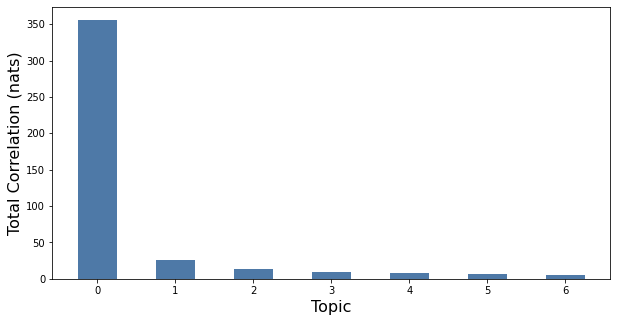

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [33]:
topic_model.tc

424.01833139725136

## Analysis by topic

### Reading video json

In [40]:
import pandas as pd
df = pd.DataFrame(videos)

In [ ]:
for topic_n, topic_docs in enumerate(top_docs):
    docs,probs = zip(*topic_docs)
    topic_str = str(topic_n + 1) + ': '+ ','.join(files[x].split("/")[-1] for x in docs)
    print(topic_str)

[ 2.79861406e+00  5.56577733e-01  3.10680846e-01 -9.28882636e-01
  9.22411948e-01  2.95568396e-01  2.07652863e+00  9.48734327e-02
 -1.26255920e+00 -1.64000824e+00 -6.05035000e-01  1.97206147e-01
 -2.49030124e-01 -7.34269949e-02  8.73641162e-01  5.39405194e-01
 -2.47456709e-01 -1.49242290e+00  3.05704013e-03 -3.69403640e-01
 -7.84393104e-02 -1.35224060e+00  1.40160282e+00 -3.49348485e-01
  1.23612582e+00  2.47057490e-01 -1.06502303e-01  2.86136583e-01
 -8.39452165e-02 -1.63984345e+00  7.47821691e-01  6.81935992e-01
 -1.94770844e+00 -4.76038547e-02  1.21919407e+00  1.45869409e+00
  4.07985034e-01  1.81570824e+00  8.51486809e-01 -3.41094524e-01
 -9.87356756e-01 -5.98585196e-02  9.72100267e-03 -4.14959770e-01
  9.51320538e-01  9.47307201e-01  2.24927833e-01  2.44009543e-01
  1.04663677e-01  1.01216492e+00 -2.25975956e+00  9.98032550e-01
  7.21317507e-01 -1.36788740e+00  5.49275362e-01  2.73793924e+00
  6.08421241e-01 -5.76136388e-01  1.16418665e+00  1.34979399e-01
  5.27587506e-01 -4.22188

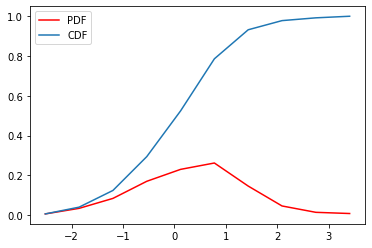

In [136]:
import pandas as pd
  
# No of Data points
N = 500
  
# initializing random values
data = np.random.randn(N)

print (data)
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()